# OIL AND GAS EMISSIONS

## Project Statement:
1. This dataset provides an in depth look into the global CO2 emissions at the country level, allowing for a better understanding on how much a country contributes to the global cumulative human impact on climate.

2. Columns : It contains total information as well as coal, oil, gas, cement production and flaring and other resources.

3. The dataset also provides a breakdown of per-capita CO2 emission per country -showing the countries are leading in pollution levels and identifying potential areas where the reduction efforts shoukd be concentrated.

4. The dataset is essential for anyone who is concerned about its own environmental footprint or conduct on intentional development trends.

## Project dictionary:

DATAFRAMES:

DF1: Mt CO2

DF2: per capita

DF3: sources

Country: The name of the country. (String)

ISO 3166-1 alpha-3: The three-letter code for the country. (String)

Year: The year of the data. (Integer)

Total: The total amount of CO2 emissions for the country in the given year. (Float)

Coal: The amount of CO2 emissions from coal for the country in the given year. (Float)

Oil: The amount of CO2 emissions from oil for the country in the given year. (Float)

Gas: The amount of CO2 emissions from gas for the country in the given year. (Float)

Cement: The amount of CO2 emissions from cement production for the country in the given year. (Float)

Flaring: The amount of CO2 emissions from flaring operations for the country in the given year. (Float)

Other: The amount of CO2 emissions from other sources for the country in the given year. (Float)

Per Capita: The amount of CO2 emissions per capita for the country in the given year. (Float)

Data Source Citation: Andrew, Robbie M., & Peters, Glen P. (2022). The Global Carbon Project's fossil CO2 emissions dataset (2022v27) [Data set]. Zenodo.

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np

In [2]:
#EDA and VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as po
import plotly.graph_objs as pg

In [3]:
#changing the decimal points for floats in the dataset
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df1=pd.read_csv(r"C:\Users\HP\Documents\DATA SCIENCE\PYTHON EDA PROJECTS\Oil and Gas CO2 emissions\Oil-and-Gas-Emissions-Tracking-main\GCB2022v27_MtCO2_flat.csv")

In [5]:
df2=pd.read_csv(r"C:\Users\HP\Documents\DATA SCIENCE\PYTHON EDA PROJECTS\Oil and Gas CO2 emissions\Oil-and-Gas-Emissions-Tracking-main\GCB2022v27_percapita_flat.csv")

In [6]:
df3=pd.read_csv(r"C:\Users\HP\Documents\DATA SCIENCE\PYTHON EDA PROJECTS\Oil and Gas CO2 emissions\Oil-and-Gas-Emissions-Tracking-main\GCB2022v27_sources_flat.csv")

In [7]:
df1.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [9]:
df1.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50
63103,Global,WLD,2021,37123.85,14979.60,11837.16,7921.83,1672.59,416.53,296.15,4.69


In [10]:
df1.shape

(63104, 11)

since we can see a lot of nan values, hence we do some inspection of the data.

In [11]:
df1.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

From dtypes we see that there are 3 diffrent kinds of data types: String values[object], integer values[int] and Decimal values[float].

In [12]:
df1.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [13]:
df1.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.00,62904.00,21744.00,21717.00,21618.00,20814.00,21550.00,1620.00,18974.00
mean,1885.50,55.22,73.97,55.76,23.50,4.33,1.71,10.95,4.41
std,78.52,824.85,598.99,519.03,247.67,50.31,16.73,39.03,17.43
min,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1817.75,0.00,0.00,0.09,0.00,0.00,0.00,0.52,0.20
50%,1885.50,0.00,0.27,1.04,0.00,0.02,0.00,1.26,1.30
75%,1953.25,0.55,6.74,8.34,0.58,0.57,0.00,4.39,5.08
max,2021.00,37123.85,15051.51,12345.65,7921.83,1672.59,439.25,306.64,834.19


1. We see that we have data from year 1750 to 2021.
2. Per capita means the individual contribution of emission.

# Data Inspection

In [14]:
co2 = df1.copy()

In [15]:
per_capita = df2.copy()

In [16]:
sources = df3.copy()

In [17]:
#checking the info of the dataset

In [18]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [19]:
per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               18972 non-null  float64
 4   Coal                17138 non-null  float64
 5   Oil                 17039 non-null  float64
 6   Gas                 17012 non-null  float64
 7   Cement              15448 non-null  float64
 8   Flaring             16944 non-null  float64
 9   Other               1620 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ MB


In [20]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             63104 non-null  object
 1   ISO 3166-1 alpha-3  61472 non-null  object
 2   Year                63104 non-null  int64 
 3   Total               63104 non-null  object
 4   Coal                63104 non-null  object
 5   Oil                 63104 non-null  object
 6   Gas                 63104 non-null  object
 7   Cement              63104 non-null  object
 8   Flaring             63104 non-null  object
 9   Other               63104 non-null  object
 10  Per Capita          63104 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.3+ MB


In [21]:
#filling all nan values with 0
co2 = df1.fillna(0)
co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,AFG,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,AFG,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,AFG,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50


Here, we used 0 to fill the nan values.
 

In [22]:
co2.head(15)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,AFG,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,AFG,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,AFG,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Afghanistan,AFG,1755,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Afghanistan,AFG,1756,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Afghanistan,AFG,1757,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Afghanistan,AFG,1758,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Afghanistan,AFG,1759,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Now. we want to check actually how many countries are there. ie we go and check unique values for variable countries

In [23]:
co2.Country.value_counts()

Afghanistan    272
Peru           272
Niger          272
Nigeria        272
Niue           272
              ... 
Greenland      272
Grenada        272
Guadeloupe     272
Guatemala      272
Global         272
Name: Country, Length: 232, dtype: int64

We see that there are 232 countries which have 272 rows each. We also observe that the total count is 232 x 272 = 63104.

In [25]:
232*272

63104

In [27]:
co2.shape

(63104, 11)

In [28]:
co2.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

We will now see how many unique countries are present.

In [31]:
co2.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [32]:
co2.Country.nunique()

232

In [33]:
#filtering the row elements in the country column

In [34]:
co2=co2[co2['Country']!='Global']

In [35]:
co2.Country.nunique()

231

In [36]:
#hence, we have removed the element Global from Country list.

In [37]:
dfx = co2[['Country','Year','Total']]

In [38]:
dfx.head()

,Country,Year,Total
0,Afghanistan,1750,0.00
1,Afghanistan,1751,0.00
2,Afghanistan,1752,0.00
3,Afghanistan,1753,0.00
4,Afghanistan,1754,0.00


In [39]:
dfx.tail()

,Country,Year,Total
62827,International Transport,2017,1230.51
62828,International Transport,2018,1270.69
62829,International Transport,2019,1249.56
62830,International Transport,2020,938.51
62831,International Transport,2021,1021.75


Using a group by function to group the total number of emissions from 1750 to 2021 group according to the cities.

In [40]:
dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

Country
USA                       421906.86
China                     249352.82
Russia                    117547.63
Germany                    93290.50
United Kingdom             78508.72
Japan                      66711.08
India                      57105.39
International Transport    43062.67
France                     39105.76
Canada                     34115.40
Name: Total, dtype: float64

We observe the following:

1. People in USA has the highest emissions.
2. Only country and year columns have null values.
3. We observe that there are 232 countries having 272 rows for them.
4. The top 10 countries contributing to the emissions are USA, China, Russia, Germany, United Kingdom, Japan, India, International Transport, France, Canada. {listed in the descending order.}

## Exploratory Data Analysis

We will now create a plot to describe the countries with most emissions through a plot.

In [54]:
country_total = dfx.groupby(['Country']).Total.sum().sort_values(ascending=False)[:10]

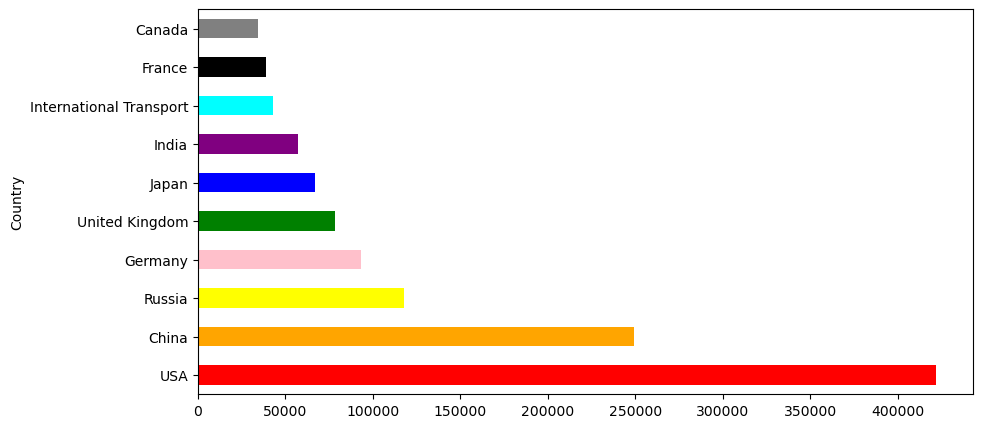

In [55]:
plt.figure(figsize=(10,5))
colors=['red','orange','yellow','pink','green','blue','purple','cyan','black','grey']
plot_1 = country_total.plot.barh(color=colors)


In [57]:
 #Emissions in India
dfx.query('Country=="India"')

,Country,Year,Total
25296,India,1750,0.00
25297,India,1751,0.00
25298,India,1752,0.00
25299,India,1753,0.00
25300,India,1754,0.00
...,...,...,...
25563,India,2017,2434.87
25564,India,2018,2600.45
25565,India,2019,2626.46
25566,India,2020,2445.01


We now create a line graph to see the increase of emissions starting from 1750 through 2021. 

In [58]:
india = dfx.query('Country=="India"')
india

,Country,Year,Total
25296,India,1750,0.00
25297,India,1751,0.00
25298,India,1752,0.00
25299,India,1753,0.00
25300,India,1754,0.00
...,...,...,...
25563,India,2017,2434.87
25564,India,2018,2600.45
25565,India,2019,2626.46
25566,India,2020,2445.01


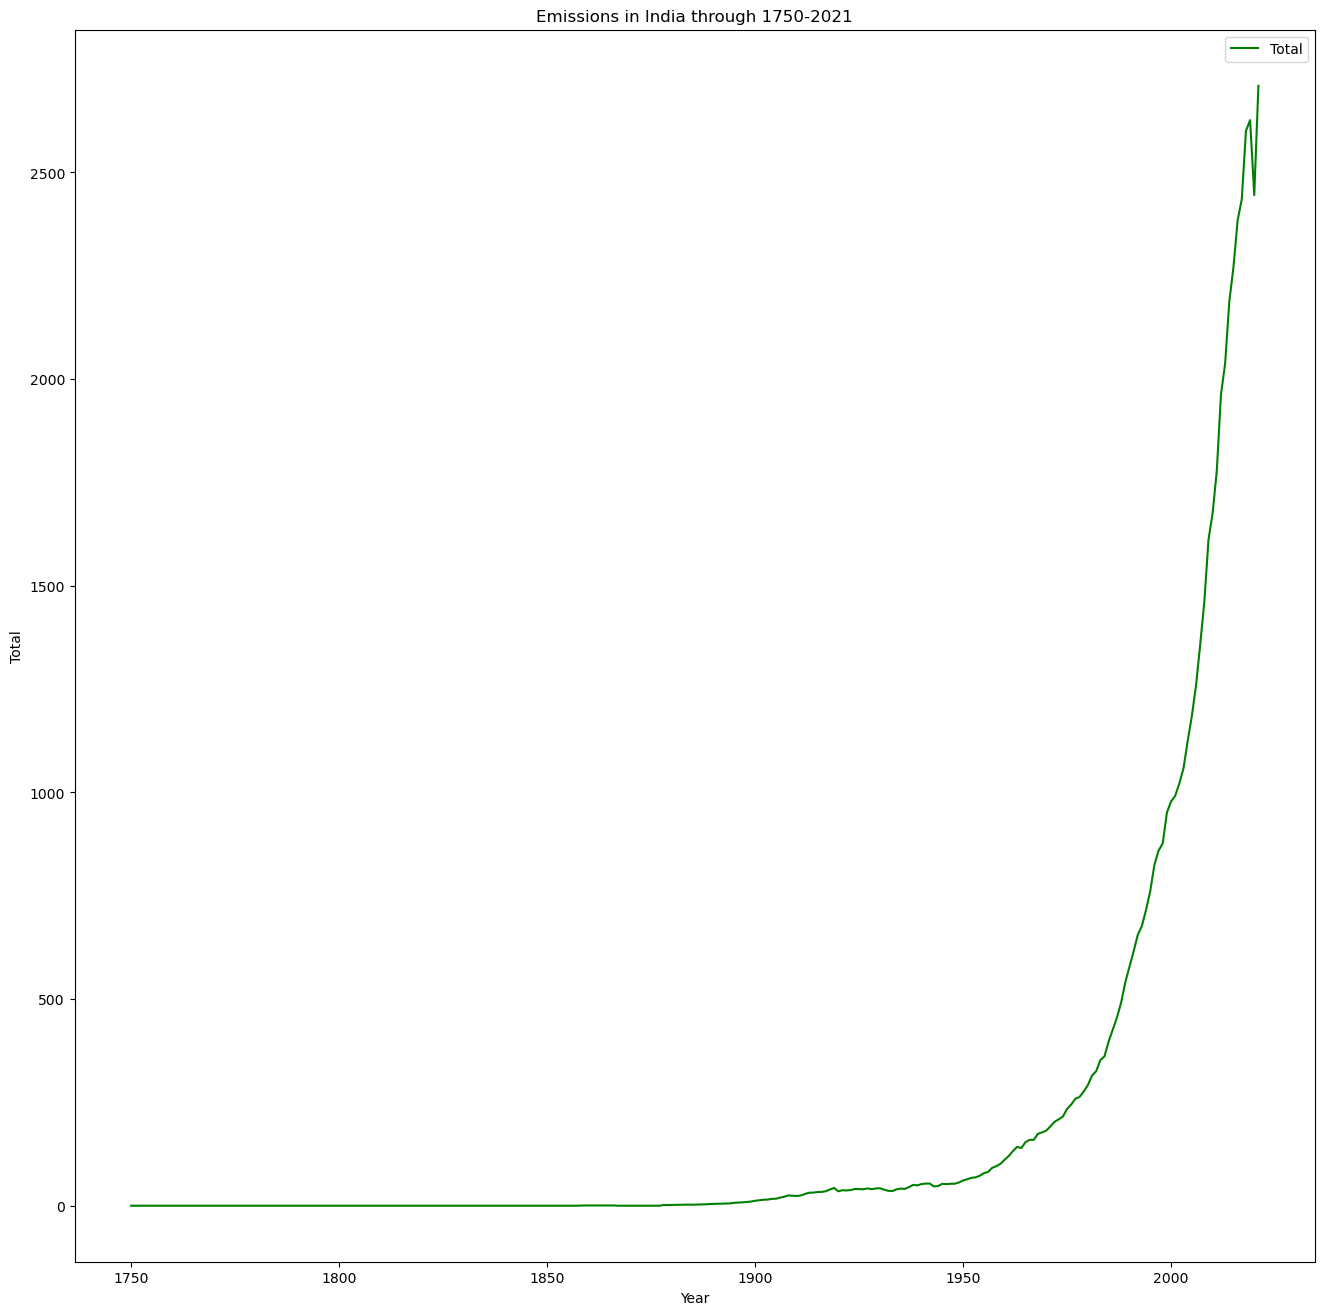

In [62]:
#line graph representation of Emissions in India

color='green'
plot_2 = india.plot(x='Year', y='Total', figsize=(16,16), color= color)
plot_2.set_ylabel('Total')
plot_2.set_title('Emissions in India through 1750-2021')
plt.show()

We will now find in which year India had thwe highest emissions.

In [79]:
max_india = ddt[ddt['Country']=='India']['Total'].max()

#print the result
print(f"The maximum emission value for India is: {max_india}")

max_india_year = ddt[ddt['Total']== max_india]['Year'].values[0]

#print the result
print(f"The maximum emissions in India were in the year : {max_india_year}")

The maximum emission value for India is: 2709.683625
The maximum emissions in India were in the year : 2021


OBSERVATION: From the line graph that the carbon emissions have increased exponentially from year 1950 in the Indian subcontinent.

We shall now look at the carbon emissions in USA and China seperately.

In [64]:
USA = dfx.query('Country=="USA"')
USA

,Country,Year,Total
59840,USA,1750,0.00
59841,USA,1751,0.00
59842,USA,1752,0.00
59843,USA,1753,0.00
59844,USA,1754,0.00
...,...,...,...
60107,USA,2017,5210.96
60108,USA,2018,5376.66
60109,USA,2019,5259.14
60110,USA,2020,4715.69


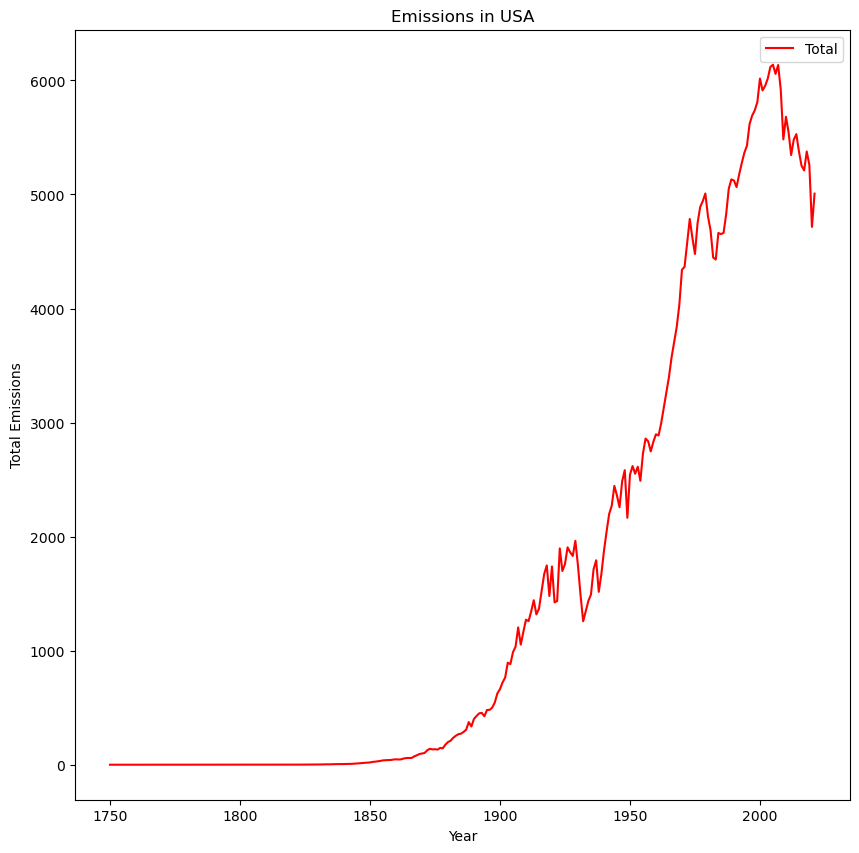

In [65]:
color='red'
plot_3 = USA.plot(x='Year', y='Total', figsize=(10,10), color=color)
plot_3.set_ylabel('Total Emissions')
plot_3.set_title('Emissions in USA')
plt.show()

We will see which is the largest value of emissions in Usa and in what year.

In [81]:
max_usa = ddt[ddt['Country']=='USA']['Total'].max()

#print the result
print(f"The maximum emission value for USA is: {max_usa}")

max_usa_year = ddt[ddt['Total']== max_usa]['Year'].values[0]

#print the result
print(f"The maximum emissions in USA were in the year : {max_usa_year}")

The maximum emission value for USA is: 6137.603445
The maximum emissions in USA were in the year : 2005


OBSERVATION: The emission starts to increase from the year 1900 but gradually decreases due to active concern about the environment and taking measures to reduce carbon emission rate. The value again increases around the year 1950 and on reaching the year 2000 the total emissions reach 6000.After 2000, again measures are taken to reduce the impact of industrialisation to reduce the total emissions.

We will now plot the line graph for china.

In [66]:
china = dfx.query('Country=="China"')
china

,Country,Year,Total
10608,China,1750,0.00
10609,China,1751,0.00
10610,China,1752,0.00
10611,China,1753,0.00
10612,China,1754,0.00
...,...,...,...
10875,China,2017,10011.11
10876,China,2018,10353.88
10877,China,2019,10741.00
10878,China,2020,10956.21


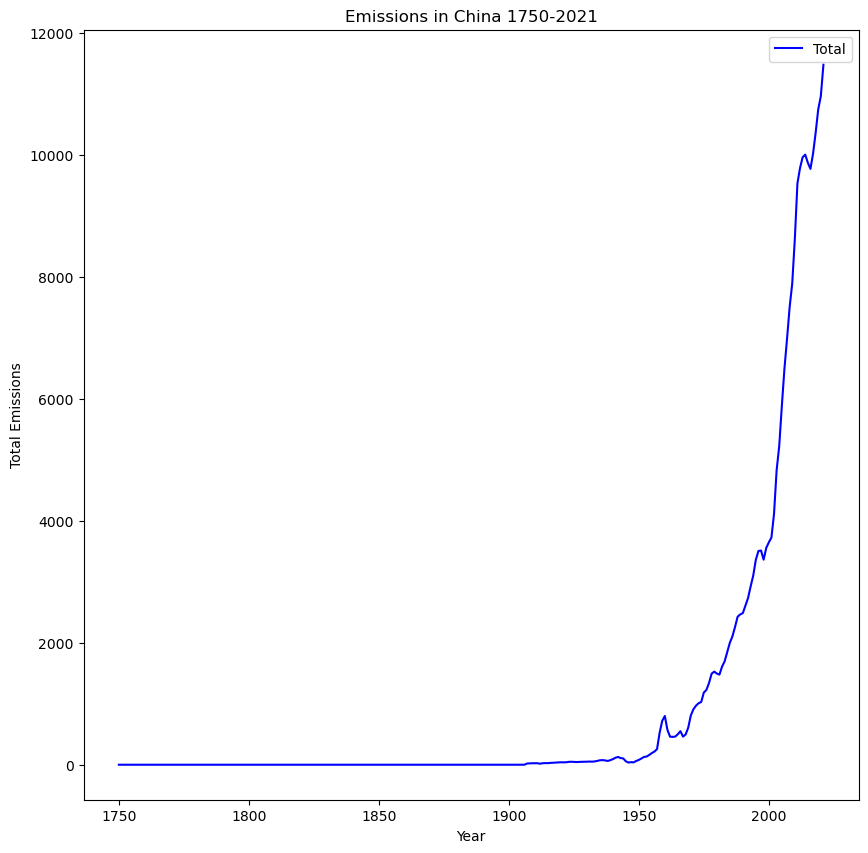

In [69]:
color='blue'
plot_4=china.plot(x='Year',y='Total',figsize=(10,10),color=color)
plot_4.set_ylabel('Total Emissions')
plot_4.set_title('Emissions in China 1750-2021')
plt.show()

We will see in which year the carbon emissions were highest for China

In [83]:
max_china = ddt[ddt['Country']=='China']['Total'].max()

#print the result
print(f"The maximum total emission value for China is: {max_china}")

max_china_year = ddt[ddt['Total']== max_china]['Year'].values[0]

#print the result
print(f"The maximum total emissions in China were in the year : {max_china_year}")

The maximum total emission value for China is: 11472.369171
The maximum total emissions in China were in the year : 2021


OBSERVATION: There was a steap rise in the emissions after 1950 and which exponentially increased in the future.We can also refer to the industrialisation that happened in China and a lot of import and export of products which increased the carbon emission rate.

Now we will plot the graph for all the top 10 countries together.

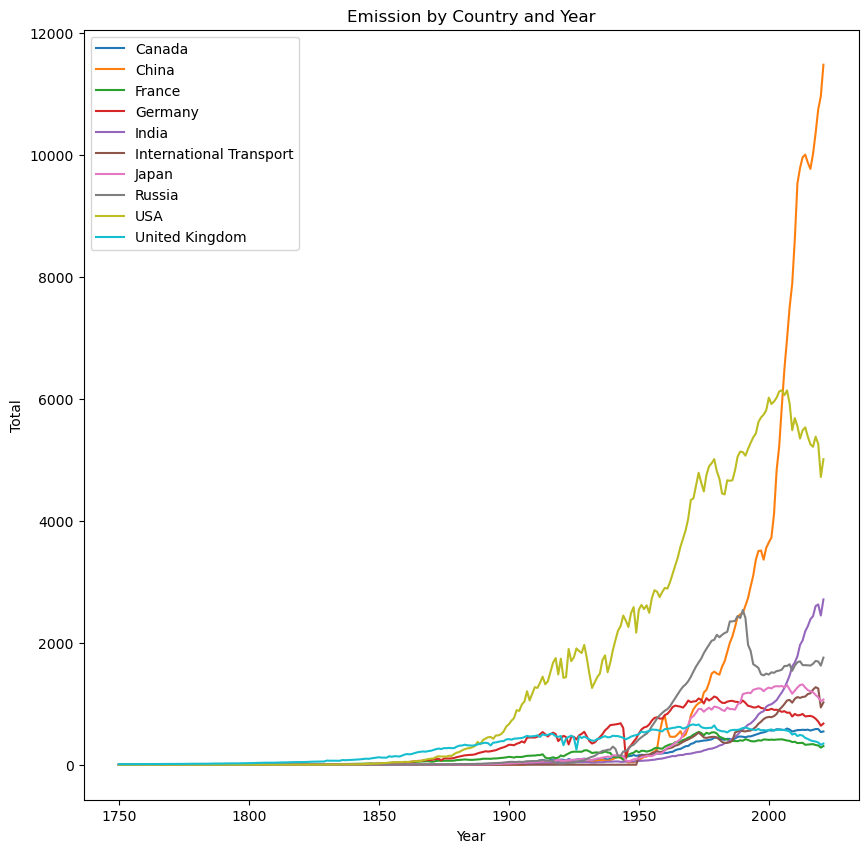

In [73]:
#create a dataframe from figure
plt.figure(figsize=(10,10))
ddt=co2.copy()

df=ddt[ddt['Country'].isin(['USA','China','Russia','Germany','United Kingdom','Japan','International Transport','India','France','Canada'])]
grouped = df.groupby("Country")

#plot the line graph for each country
for name,group in grouped:
    plt.plot(group['Year'], group['Total'],label=name)
#adding title xaxis,yaxis
plt.ylabel('Total')
plt.xlabel('Year')
plt.title('Emission by Country and Year')

plt.legend()

plt.show()

OBSERVATION: We see that from the year 2000, there is a steap rise in the emissions as compared to USA. But the total emissions in USA were higher than that in China. Therefore the result.

## OIL CO2 EMISSIONS ANALYSIS

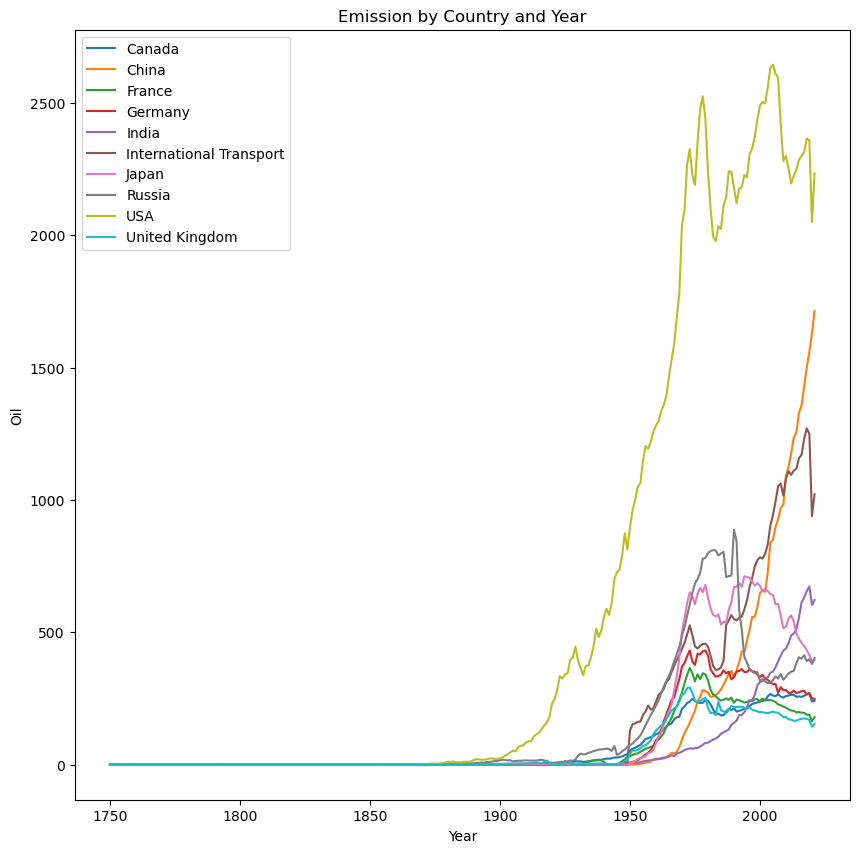

In [74]:
plt.figure(figsize=(10,10))
df=ddt[ddt['Country'].isin(['USA','China','Russia','Germany','United Kingdom','Japan','International Transport','India','France','Canada'])]

grouped = df.groupby("Country")

#plot the line graph for each country
for name,group in grouped:
    plt.plot(group['Year'], group['Oil'],label=name)
#adding title xaxis,yaxis
plt.ylabel('Oil')
plt.xlabel('Year')
plt.title('Emission by Country and Year')

plt.legend()

plt.show()

OBSERVATION: Usa has the highest emission rate.

# GAS CO2 EMISSIONS ANALYSIS

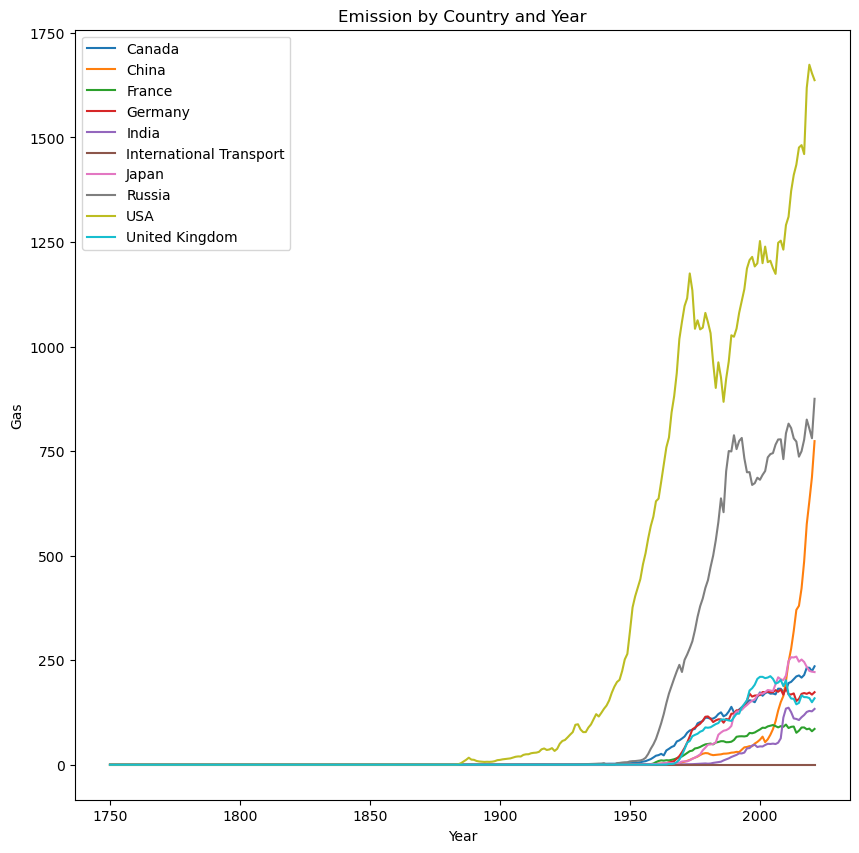

In [76]:
plt.figure(figsize=(10,10))
grouped = df.groupby("Country")
df=ddt[ddt['Country'].isin(['USA','China','Russia','Germany','United Kingdom','Japan','International Transport','India','France','Canada'])]

#plot the line graph for each country
for name,group in grouped:
    plt.plot(group['Year'], group['Gas'],label=name)
#adding title xaxis,yaxis
plt.ylabel('Gas')
plt.xlabel('Year')
plt.title('Emission by Country and Year')

plt.legend()

plt.show()

OBSERAVTION: The largest gas emissions is by USA followed by Russia.

## SUMMARY OF THE ANALYSIS:

1. Tha bar plot shows the top 10 countries where the emissions are highest in the year 1750-2021. USA stands first among the total carbon emissions followed by China.

2. We examined the total carbon emissions rate in India (1750-2021). We found that there is an exponential rise in the carbon emissions immediately after 2000s which continues thereafter. The maximum emission value for India is: 2709.683625. The maximum emissions in India were in the year : 2021.

3. We examined the total emissions in the highest emission value countries i.e. USA and China respectively. For USA, The maximum emission value is: 6137.603445 and the maximum emissions in USA were in the year : 2005. For China, the maximum total emission value is: 11472.369171. The maximum total emissions in China were in the year : 2021.

4. We also analysed the Oil and Gas emissions seperately. For Oil emissions, the line graph was plot for all the top 10 Countries . We observed that USA has the highest oil emissions followed by China. For Gas emissions, USA leads the line graph followed by Russia.

5. International Transport has the least emission rate.
